In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(r'C:\Users\mandi\OneDrive\Desktop\Health_Sleep_Statistics.csv')

data.head()
Frist five rows

In [5]:
data.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [6]:
data.tail()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no
99,100,41,m,6,00:30,07:00,5000,2200,medium,unhealthy,no,no


In [7]:
# Assuming 'data' is your DataFrame
rows, columns = data.shape

print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")


Total Rows: 100
Total Columns: 12


In [8]:
# Check data types, non-null counts, etc.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


Overall Description
The dataset is clean, with no missing values, and it includes both numerical and categorical data types. This structure enables a range of analyses, such as understanding correlations between sleep quality, physical activity, and dietary habits. Additionally, having categorical data types (object) and numeric types (int64) makes this dataset versatile for statistical analysis, classification, or clustering methods.
The clean dataset with both numeric and categorical data types is ideal for diverse analyses, such as examining relationships between sleep quality, physical activity, and dietary habits.

In [9]:
# Summary statistics for numerical columns
data.describe()


,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


most users have good sleep quality, moderate daily steps, and calorie burn, with some variance among individual data points.
Overall, Daily Steps has high variability, Calories Burned shows consistency, and Sleep Quality is tightly grouped around the mean.
 Comparing these gives a holistic view of users, indicating a generally active and healthy profile with moderate variance in physical activity levels.

In [10]:
# Remove a column and update the DataFrame in-place
data.drop(columns=['User ID'], inplace=True)


In [11]:
data.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [12]:
# Check for missing values
data.isnull().sum()


Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

 ## Age and sleep Quality 

In [13]:
age_sleep_quality_corr = data [['Age', 'Sleep Quality']].corr()
age_sleep_quality_corr 



,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [14]:
age_sleep_quality_corr ['Age']


Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


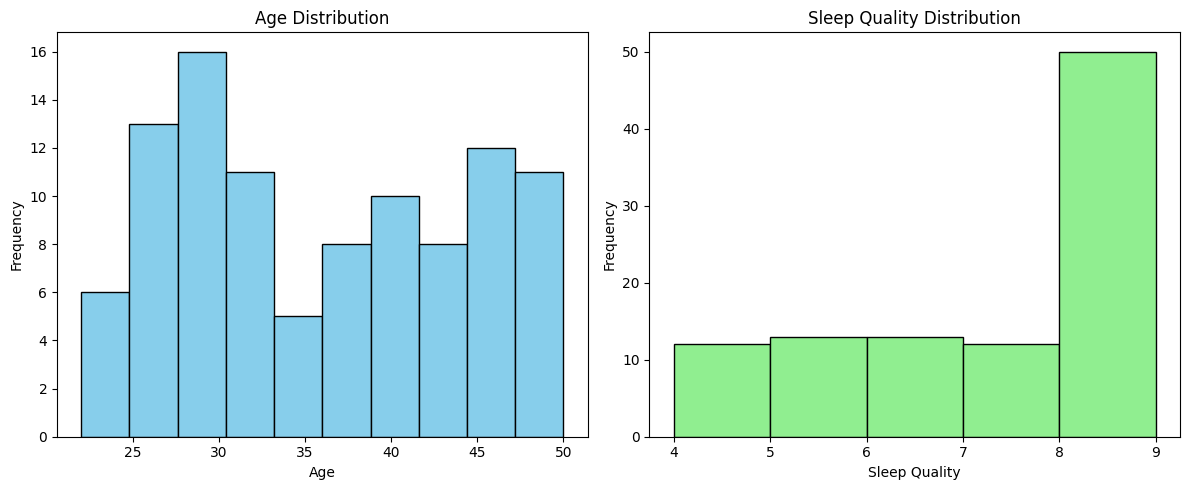

In [17]:
import matplotlib.pyplot as plt

# Histogram for Age
plt.figure(figsize=(12, 5))

# Age Histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Sleep Quality Histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.hist(data['Sleep Quality'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Sleep Quality Distribution')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


The Age histogram shows a spread across different age groups, with certain age ranges more represented. The Sleep Quality histogram reveals most users rate sleep quality around similar values, indicating consistency in their sleep experiences. Peaks in both histograms suggest common trends, offering a quick view of user demographics and typical sleep ratings.

In [18]:
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
# Load data (replace with your actual file path)

# Define features and target variable
X = data[['Age']]  # Independent variable
y = data['Sleep Quality']  # Dependent variable


Predict and Evaluate the Model
Calculate the model’s performance metrics, such as R-squared and Mean Squared Error (MSE).

For linnerRegression 

In [21]:
age_sleep_quality_model = LinearRegression()

X = data[["Age"]]
y = data ['Sleep Quality']
age_sleep_quality_model.fit(X,y)

LinearRegression()

In [22]:
age_sleep_quality_model.intercept_

np.float64(13.268812023190646)

In [23]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [24]:
age_sleep_quality_predication = age_sleep_quality_model.predict(X)

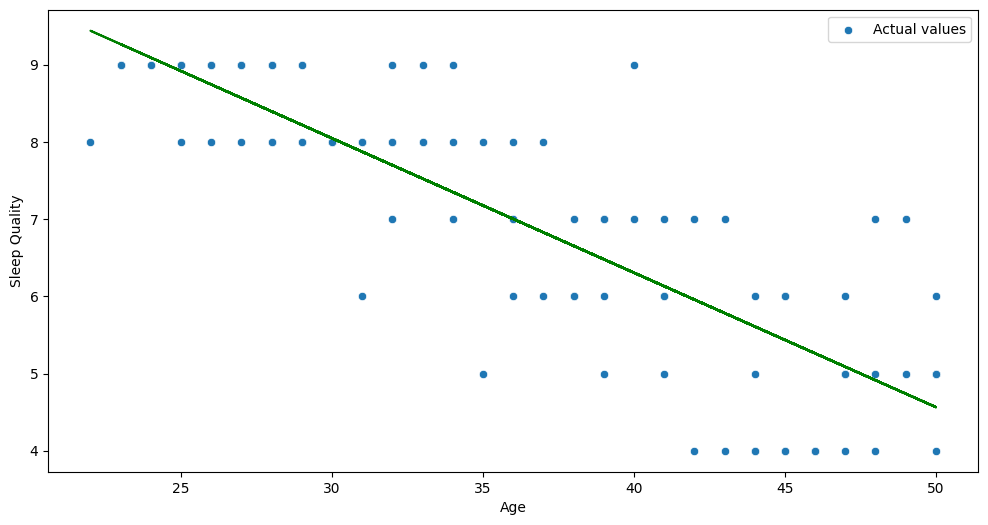

In [25]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Age', y = 'Sleep Quality', data = data, label = 'Actual values')
plt.plot(X, age_sleep_quality_predication, color = 'green')
plt.show()

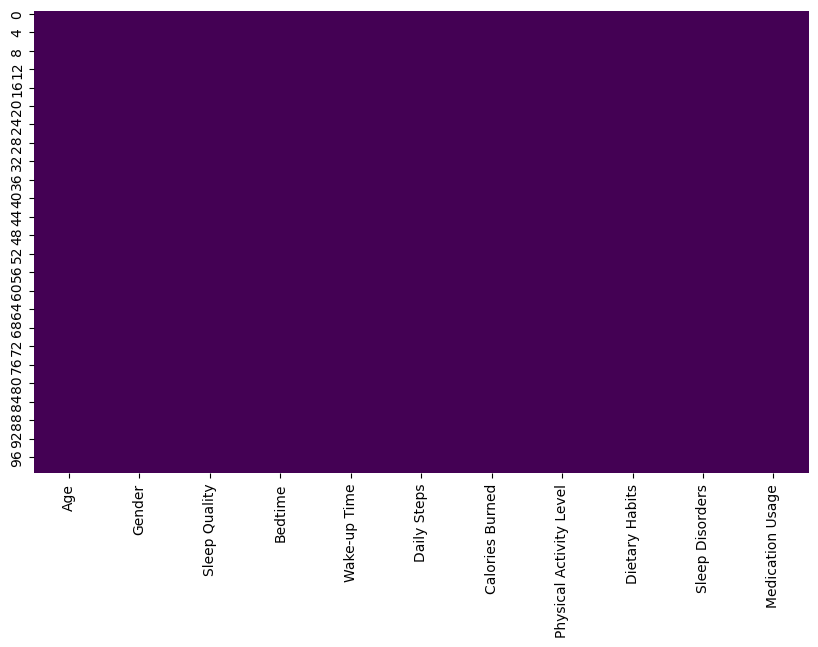

In [26]:
# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

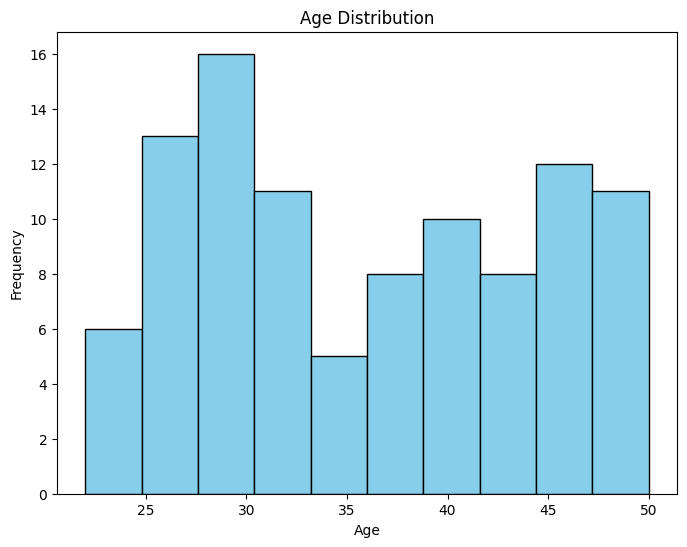

In [27]:
# Histogram for Age
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


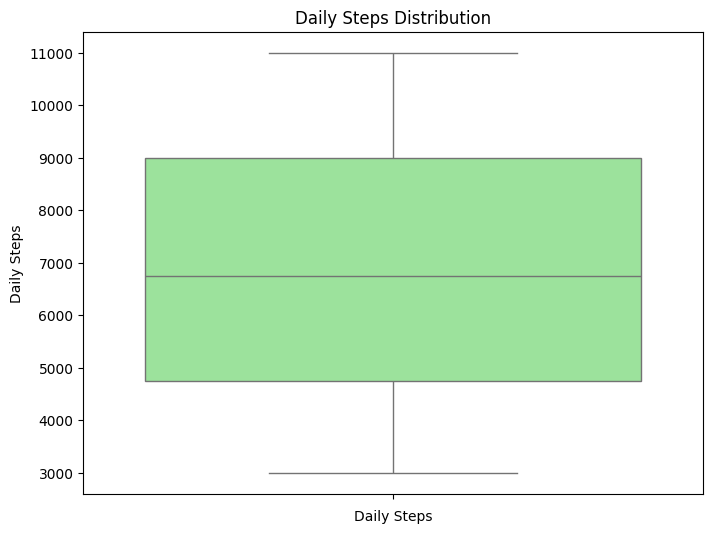

In [28]:
# Box plot for Daily Steps
plt.figure(figsize=(8, 6))
sns.boxplot(data['Daily Steps'], color='lightgreen')
plt.title('Daily Steps Distribution')
plt.xlabel('Daily Steps')
plt.show()


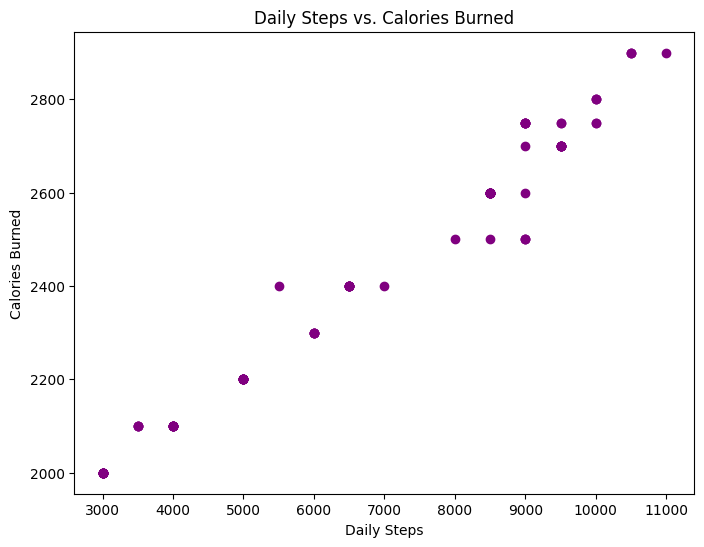

In [29]:
# Scatter plot for Daily Steps vs. Calories Burned
plt.figure(figsize=(8, 6))
plt.scatter(data['Daily Steps'], data['Calories Burned'], color='purple')
plt.title('Daily Steps vs. Calories Burned')
plt.xlabel('Daily Steps')
plt.ylabel('Calories Burned')
plt.show()


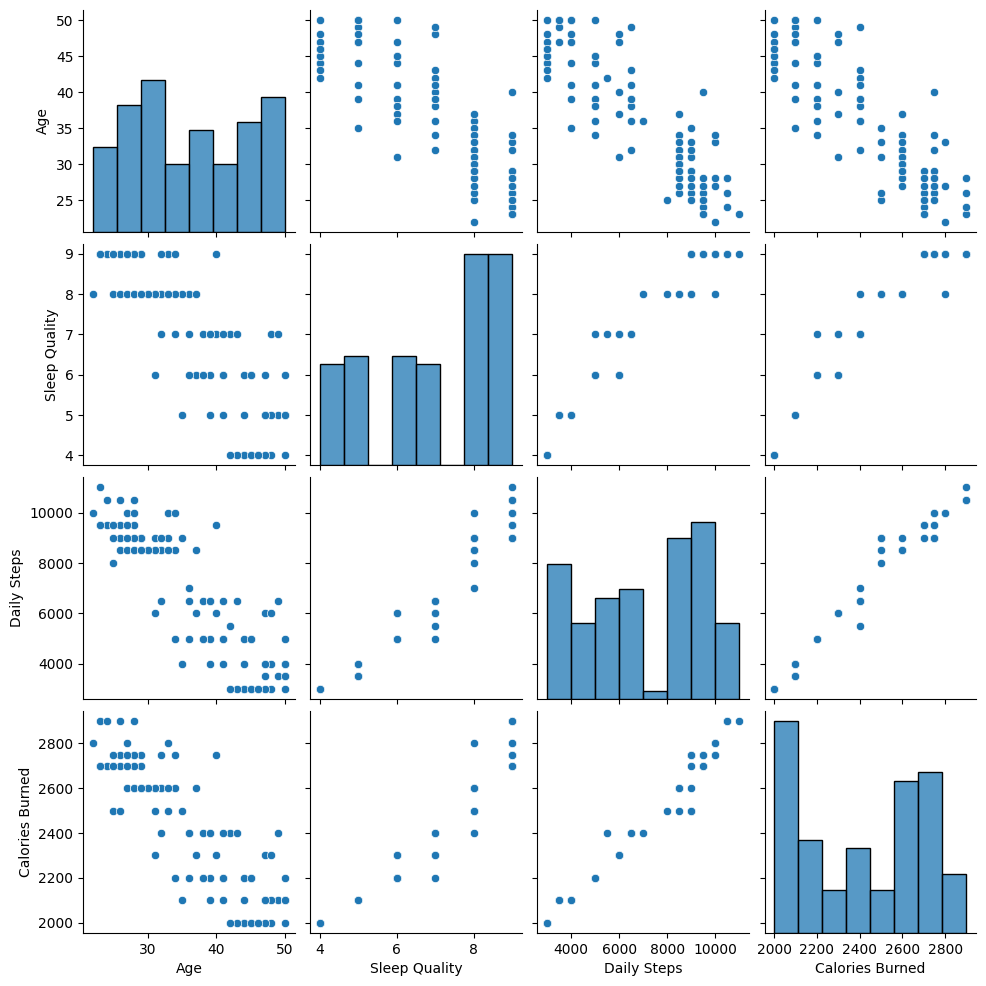

In [30]:
# Pair plot for multiple numerical columns
sns.pairplot(data[['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']])
plt.show()


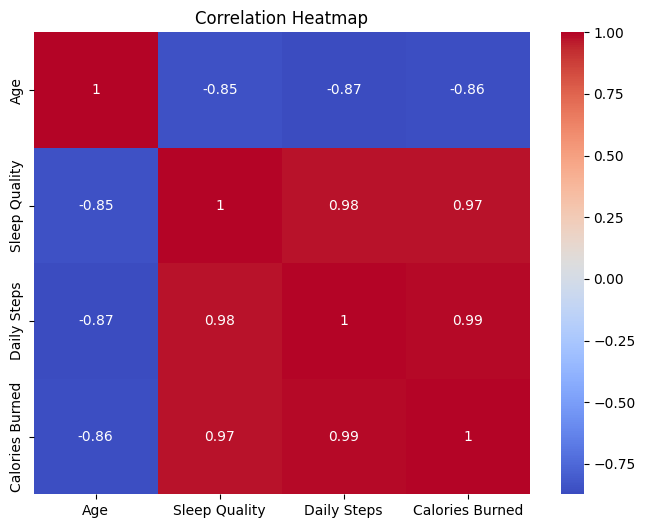

In [31]:
# Heatmap for correlation between numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Merge on 'User ID' column
merged_data = pd.merge(data1, data2, on='User ID', how='inner')  # You can use 'left', 'right', or 'outer' joins as needed
on='User ID' specifies the column to join on.
how='inner' specifies the type of join ('inner', 'outer', 'left', or 'right').
print(merged_data.head())
